```
Student-1
Name: Khondaker Faisal Ibn Aziz
ID# 21-44398-1
```

```
Student-2
Name: Irfan Kabir Shihab
ID# 20-43853-2
```




*   Mount your google drive.



In [ ]:
# mount google drive if you are using Colab
# otherewise, leave it blank

# start writing your code here



*   Import all necessary libraries.



In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [2]:
import pandas as pd
dataset_path = ('D:\FaisalMahi\Drive E\Phitron\Python\FinalTerm\online_gaming_behavior_dataset.csv')
data = pd.read_csv(dataset_path)
data = shuffle(data)
print(data)

       PlayerID  Age  Gender Location GameGenre  PlayTimeHours  \
21894     30894   41    Male   Europe       RPG       8.073900   
31522     40522   21    Male   Europe    Sports      10.020209   
10389     19389   34  Female   Europe  Strategy       1.499815   
25004     34004   23  Female   Europe       RPG      12.824160   
38675     47675   35    Male   Europe    Action      17.480666   
...         ...  ...     ...      ...       ...            ...   
36147     45147   49  Female     Asia       RPG      16.546004   
7806      16806   23    Male    Other       RPG      19.555385   
35648     44648   36    Male   Europe    Action       7.880989   
11372     20372   35    Male     Asia    Action      12.022734   
32481     41481   34    Male     Asia  Strategy       4.794898   

       InGamePurchases GameDifficulty  SessionsPerWeek  \
21894                0           Hard               15   
31522                0         Medium               16   
10389                1           

<>:2: SyntaxWarning: invalid escape sequence '\F'
<>:2: SyntaxWarning: invalid escape sequence '\F'
C:\Users\aziza\AppData\Local\Temp\ipykernel_19748\4049490986.py:2: SyntaxWarning: invalid escape sequence '\F'
  dataset_path = ('D:\FaisalMahi\Drive E\Phitron\Python\FinalTerm\online_gaming_behavior_dataset.csv')


•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [3]:
data = data.drop_duplicates()
print("Missing values before cleaning:\n", data.isnull().sum())
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    data[col] = data[col].fillna(data[col].mean())
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])
print("Missing values after cleaning:\n", data.isnull().sum())
data['Age'] = data['Age'].apply(lambda x: x if 10 <= x <= 100 else data['Age'].mean())
valid_genders = ['Male', 'Female', 'Other']
data['Gender'] = data['Gender'].apply(lambda x: x if x in valid_genders else 'Other')
print(data)


Missing values before cleaning:
 PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64
Missing values after cleaning:
 PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64
       PlayerID  Age  Gender Location GameGenre  PlayTimeHours  \
21894     30894   41    Male   Europe

•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\aziza\AppData\Local\Temp\ipykernel_19748\3772899957.py:1: SyntaxWarning: invalid escape sequence '\F'
  dataset = pd.read_csv('D:\FaisalMahi\Drive E\Phitron\Python\FinalTerm\online_gaming_behavior_dataset.csv')


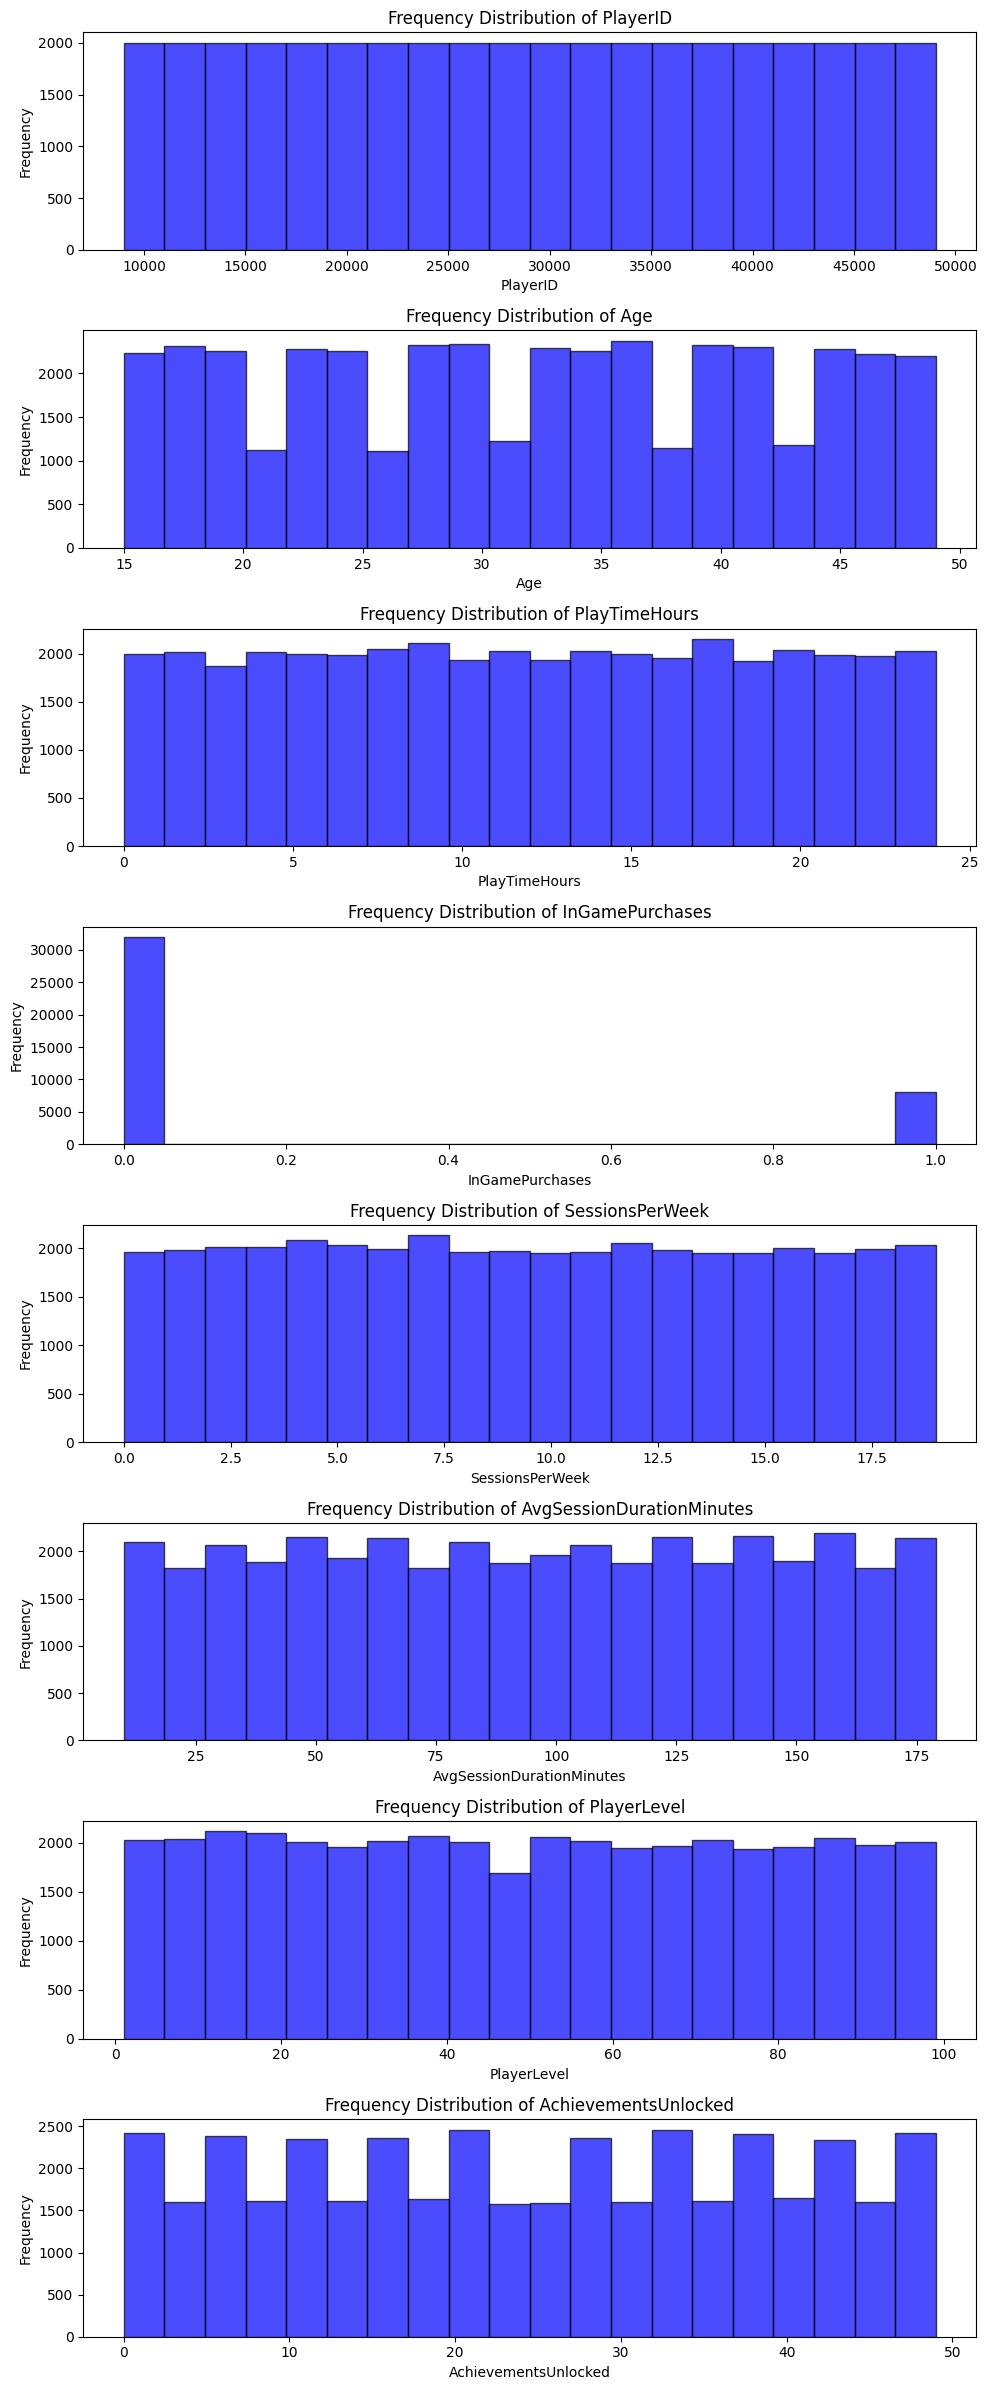

In [4]:
dataset = pd.read_csv('D:\FaisalMahi\Drive E\Phitron\Python\FinalTerm\online_gaming_behavior_dataset.csv')
numeric_columns = dataset.select_dtypes(include=['number']).columns

num_features = len(numeric_columns)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, num_features * 3))

for i, column in enumerate(numeric_columns):
    axes[i].hist(dataset[column], bins=20, color='blue', alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Frequency Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

•	**Task 4:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling whenever necessary.

In [6]:
non_numeric_columns = dataset.select_dtypes(exclude=['number']).columns
dataset_encoded = pd.get_dummies(dataset, columns=non_numeric_columns, drop_first=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset_encoded)
scaled_dataset = pd.DataFrame(scaled_data, columns=dataset_encoded.columns)

print(scaled_dataset.head())

   PlayerID       Age  PlayTimeHours  InGamePurchases  SessionsPerWeek  \
0 -1.732008  1.096023       0.614176        -0.501334        -0.602363   
1 -1.731921 -0.297969      -0.939816        -0.501334        -0.775865   
2 -1.731834 -0.994965      -0.549654        -0.501334         1.132666   
3 -1.731748  0.299456      -0.977506         1.994676        -0.081854   
4 -1.731661  0.100314       0.507275        -0.501334        -1.296374   

   AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  Gender_Male  \
0                   0.269487     1.026459              0.032814     0.819108   
1                   1.004019    -1.352160             -1.006648    -1.220840   
2                   0.963212    -0.512647              1.141573    -1.220840   
3                  -0.199798     0.256906              1.557358     0.819108   
4                   0.738771     1.586134              0.864383     0.819108   

   Location_Europe  Location_Other  Location_USA  GameGenre_RPG  \
0      

•	**Task 5:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 3241 as the value of the random_state parameter of this function.

In [10]:
data = pd.read_csv('D:\FaisalMahi\Drive E\Phitron\Python\FinalTerm\online_gaming_behavior_dataset.csv')
encoded_data = data.copy()
label_encoders = {}
categorical_columns = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
for col in categorical_columns:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col])
    label_encoders[col] = le  
X = encoded_data.drop(columns=['EngagementLevel', 'PlayerID'])  
y = encoded_data['EngagementLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3241)
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (32027, 11)
Testing features shape: (8007, 11)
Training target shape: (32027,)
Testing target shape: (8007,)


<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\aziza\AppData\Local\Temp\ipykernel_19748\3571084046.py:1: SyntaxWarning: invalid escape sequence '\F'
  data = pd.read_csv('D:\FaisalMahi\Drive E\Phitron\Python\FinalTerm\online_gaming_behavior_dataset.csv')


•	**Task 6:** Apply Support Vector Machine (SVM) Classifier to the dataset. Build (train) your prediction model in this step.

In [11]:
svm_classifier = SVC(kernel='linear', random_state=3241)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM Classifier: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of the SVM Classifier: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2094
           1       0.79      0.70      0.74      2041
           2       0.81      0.87      0.84      3872

    accuracy                           0.82      8007
   macro avg       0.83      0.81      0.82      8007
weighted avg       0.82      0.82      0.82      8007



•	**Task 7:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

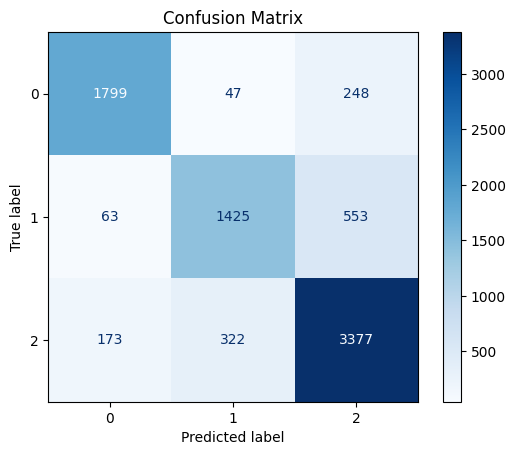

Confusion Matrix:
[[1799   47  248]
 [  63 1425  553]
 [ 173  322 3377]]


In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_classifier.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
print("Confusion Matrix:")
print(conf_matrix)


•	**Taks 8:** Calculate the train and test accuracy of your model and compare them.

In [9]:
train_predictions = svm_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {train_accuracy:.5f}")
print(f"Testing Accuracy: {test_accuracy:.5f}")
if train_accuracy > test_accuracy:
    print("The model may be overfitting the training data.")
elif train_accuracy < test_accuracy:
    print("The model may be underfitting.")
else:
    print("The model has similar performance on both training and testing data.")


Training Accuracy: 0.82415
Testing Accuracy: 0.82440
The model may be underfitting.
